## Transfer Learning with Tensorflow (Multi Class Convolutional Neural Network)

### Process

* Collect many images of like size.
* Split images into training and test sets.
* Discover potential labels / features.
* Flatten image into a tensor.
* Increase hidden units: Add weightings to get desired output.
* Try different activation functions: Helps decide what data is most important.
* Try different optimization functions: Optimize by smoothing data to expected results.
* Increase learning rate: How much to change the model based on estimated error.
* Fit longer: Increase the number of times we try to fit the data. 

### Using GPU with Colab

### Imports

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (runs on tensorflow)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Input
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Scikit-learn: Machine learning library!
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Used for accessing files and file names
import pathlib
import os
import zipfile

2024-10-31 06:34:42.966874: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 06:34:43.051892: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 06:34:43.053118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 06:34:45.253086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Download Data

I will be using the food dataset from Kaggle (https://www.kaggle.com/datasets/kmader/food41)

You can either put your images folder in the same directory as this file, or use google drive or other online storage options with Google Colab. 

* I zipped my images folder.
* Uploaded the zipped file to Google Drive in a folder called data.
* Mount the drive.
* Unzip files.

I split up images into training and test folders with a separate folder for each class 800 trained and 200 for testing. 

### Create Train and Test Folders locally

In [2]:
# # """
# # This program creates train and test folders, each folder contains 20 folders belonging to different food items, and in train folders, 800 images per food item, 
# # and in test folder, 200 images per food item.
# # """

# import os
# import random
# import shutil

# # Define paths
# source_folder = "images2/"  # Folder containing food item subfolders
# destination_folder = "images/"  # New folder where train and test will be created

# # Set up train and test folder paths
# train_folder = os.path.join(destination_folder, "train")
# test_folder = os.path.join(destination_folder, "test")

# # Parameters
# num_train_images = 80
# num_test_images = 20

# # Process each selected folder
# for food_item in os.listdir(source_folder):
#     food_path = os.path.join(source_folder, food_item)
#     images = [img for img in os.listdir(food_path) if img.lower().endswith(('.png', '.jpg', '.jpeg')) and ':Zone.Identifier' not in img]
    
#     # Ensure there are enough images for sampling
#     if len(images) < num_train_images + num_test_images:
#         print(f"Not enough images in {food_item}. Skipping.")
#         continue
    
#     # Randomly select images for train and test
#     random.shuffle(images)
#     train_images = images[:num_train_images]
#     test_images = images[num_train_images:num_train_images + num_test_images]
    
#     # Create destination subfolders for this food item in train and test
#     train_food_folder = os.path.join(train_folder, food_item)
#     test_food_folder = os.path.join(test_folder, food_item)
#     os.makedirs(train_food_folder, exist_ok=True)
#     os.makedirs(test_food_folder, exist_ok=True)
    
#     # Copy images to train and test folders
#     for img in train_images:
#         shutil.copy(os.path.join(food_path, img), train_food_folder)
#     for img in test_images:
#         shutil.copy(os.path.join(food_path, img), test_food_folder)

# print("Dataset preparation complete.")

### Mount Google Drive and Unzip Files

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# my_files = zipfile.ZipFile("/content/gdrive/MyDrive/images.zip")
# my_files.extractall()
# my_files.close()

### Analyze the Files

In [4]:
def display_random_image(dir, class_type):
    img_dir = dir + "/" + class_type
    files = os.listdir(img_dir)
    img_name = random.choice(files)
    img = mpimg.imread(img_dir + "/" + img_name)
    plt.imshow(img)
    plt.title(class_type)
    plt.axis("off")
    print(f"Image shape : {img.shape}")

Image shape : (512, 512, 3)


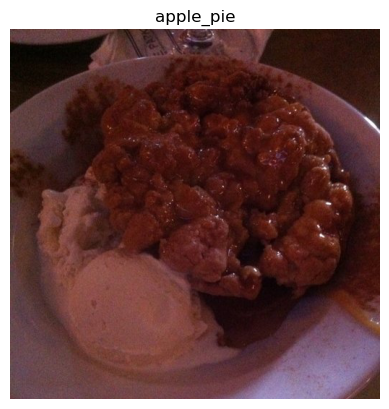

In [5]:
display_random_image("images/train/", "apple_pie")

Image shape : (384, 512, 3)


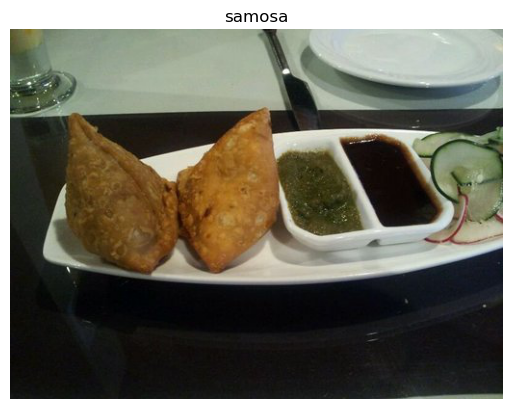

In [6]:
display_random_image("images/train/", "samosa")

Image shape : (512, 512, 3)


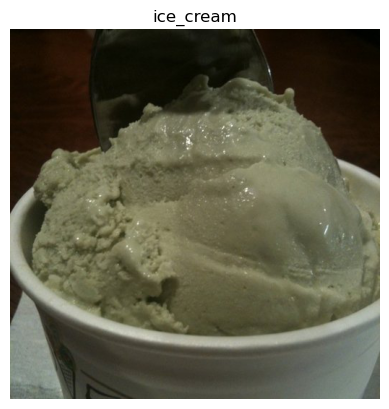

In [7]:
display_random_image("images/train/", "ice_cream")

This is a fantastic site for understanding CNNs (https://poloclub.github.io/cnn-explainer/)

### Prepare Data

In [8]:
train_dir = "images/train/"
validation_dir = "images/test/"

In [22]:
train_IDG = ImageDataGenerator(rescale=1/255)
validation_IDG = ImageDataGenerator(rescale=1/255)

train_data = train_IDG.flow_from_directory(train_dir,
                                          target_size=(128, 128),
                                          batch_size=8,
                                          class_mode="categorical")

val_data = train_IDG.flow_from_directory(validation_dir,
                                          target_size=(128, 128),
                                          batch_size=8,
                                          class_mode="categorical")

Found 1600 images belonging to 20 classes.
Found 400 images belonging to 20 classes.


### Prepare Multi-Class CNN Model

In [23]:
steps_per_epoch = train_data.n // train_data.batch_size   
validation_steps = val_data.n // val_data.batch_size     

In [24]:
model_1 = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(20),
    Activation(activation="softmax") # 20 possible outputs
])

model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=steps_per_epoch,
                       validation_data=val_data,
                       validation_steps=validation_steps)

Epoch 1/5


2024-10-31 07:09:28.556280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - ETA: 0s - loss: 2.9999 - accuracy: 0.0381

2024-10-31 07:09:49.312033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - 23s 106ms/step - loss: 2.9999 - accuracy: 0.0381 - val_loss: 2.9879 - val_accuracy: 0.0650
Epoch 2/5
200/200 [==============================] - 17s 83ms/step - loss: 2.9672 - accuracy: 0.0806 - val_loss: 2.9527 - val_accuracy: 0.0775
Epoch 3/5
200/200 [==============================] - 16s 81ms/step - loss: 2.7879 - accuracy: 0.1519 - val_loss: 2.9205 - val_accuracy: 0.1300
Epoch 4/5
200/200 [==============================] - 17s 82ms/step - loss: 2.3606 - accuracy: 0.2937 - val_loss: 2.8552 - val_accuracy: 0.1225
Epoch 5/5
200/200 [==============================] - 17s 84ms/step - loss: 1.7960 - accuracy: 0.4744 - val_loss: 2.9844 - val_accuracy: 0.1400


In [25]:
model_1.evaluate(val_data)

 3/50 [>.............................] - ETA: 1s - loss: 2.7578 - accuracy: 0.1667

2024-10-31 07:11:00.656768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 2s 39ms/step - loss: 2.9844 - accuracy: 0.1400


[2.984379768371582, 0.14000000059604645]

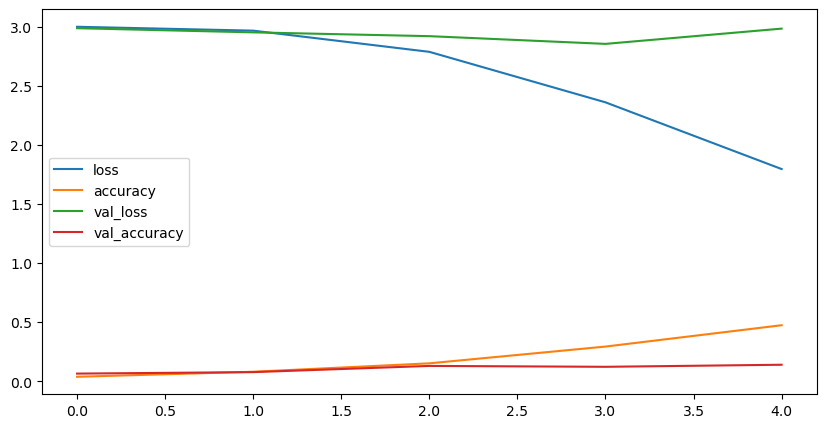

In [26]:
pd.DataFrame(history_1.history).plot(figsize=(10, 5))
plt.show()

### Augmentation

In [27]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [28]:
model_2 = Sequential([
    data_augmentation,
    Input(shape=(128, 128, 3)),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(20),
    Activation(activation="softmax") # 20 possible outputs
])

model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=steps_per_epoch,
                       validation_data=val_data,
                       validation_steps=validation_steps)

Epoch 1/5


2024-10-31 07:11:18.802141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - ETA: 0s - loss: 2.9921 - accuracy: 0.0544

2024-10-31 07:11:36.675899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - 20s 91ms/step - loss: 2.9921 - accuracy: 0.0544 - val_loss: 2.9674 - val_accuracy: 0.0650
Epoch 2/5
200/200 [==============================] - 18s 90ms/step - loss: 2.9229 - accuracy: 0.0913 - val_loss: 2.8842 - val_accuracy: 0.1200
Epoch 3/5
200/200 [==============================] - 19s 96ms/step - loss: 2.8246 - accuracy: 0.1244 - val_loss: 2.8301 - val_accuracy: 0.1400
Epoch 4/5
200/200 [==============================] - 18s 90ms/step - loss: 2.7374 - accuracy: 0.1462 - val_loss: 2.7872 - val_accuracy: 0.1425
Epoch 5/5
200/200 [==============================] - 18s 90ms/step - loss: 2.7170 - accuracy: 0.1462 - val_loss: 2.7697 - val_accuracy: 0.1675


In [64]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, None, None, None)  0         
                                                                 
 input_6 (InputLayer)        multiple                  0         
                                                                 
 conv2d_17 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 activation_22 (Activation)  (None, None, None, 10)    0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, None, None, 10)    910       
                                                      

In [29]:
model_2.evaluate(val_data)

 3/50 [>.............................] - ETA: 2s - loss: 2.7301 - accuracy: 0.0833    

2024-10-31 07:12:54.248469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 4s 72ms/step - loss: 2.7697 - accuracy: 0.1675


[2.769707441329956, 0.16750000417232513]

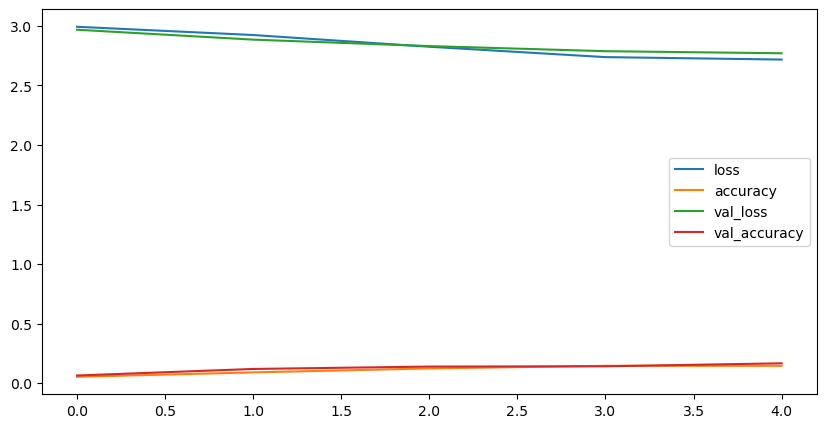

In [30]:
pd.DataFrame(history_2.history).plot(figsize=(10, 5))
plt.show()

In [33]:
class_names = os.listdir('images/train/')
class_names.sort()
class_names

['apple_pie',
 'baby_back_ribs',
 'beef_carpaccio',
 'caesar_salad',
 'carrot_cake',
 'deviled_eggs',
 'edamame',
 'falafel',
 'garlic_bread',
 'hamburger',
 'ice_cream',
 'lasagna',
 'macaroni_and_cheese',
 'nachos',
 'omelette',
 'pad_thai',
 'ramen',
 'samosa',
 'tacos',
 'waffles']

### Make Predictions on Outside Images

(-0.5, 611.5, 407.5, -0.5)

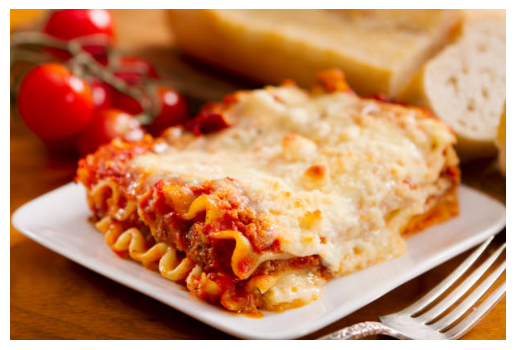

In [35]:
lasagna = mpimg.imread("test-lasagna-img.jpg")
plt.imshow(lasagna)
plt.axis(False)

In [36]:
lasagna.shape

(408, 612, 3)

### Normalize and Resize

In [37]:
def normalize_and_resize(img_loc):
    my_img = tf.io.read_file(img_loc)
    my_img = tf.image.decode_image(my_img)
    my_img = tf.image.resize(my_img, size=[128, 128])
    my_img = my_img / 255
    return my_img

In [38]:
lasagna = normalize_and_resize("test-lasagna-img.jpg")
lasagna

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[9.1372550e-01, 5.6078434e-01, 0.0000000e+00],
        [9.1372550e-01, 5.6078434e-01, 0.0000000e+00],
        [9.1764706e-01, 5.6470591e-01, 0.0000000e+00],
        ...,
        [9.6558094e-01, 8.2316178e-01, 6.7146331e-01],
        [9.7218138e-01, 8.3492649e-01, 6.8517154e-01],
        [9.6115196e-01, 8.4350491e-01, 6.9448531e-01]],

       [[9.1764706e-01, 5.6470591e-01, 0.0000000e+00],
        [9.1764706e-01, 5.6470591e-01, 0.0000000e+00],
        [9.1764706e-01, 5.6470591e-01, 0.0000000e+00],
        ...,
        [9.4704926e-01, 8.0684358e-01, 6.3627452e-01],
        [9.5594364e-01, 8.1979167e-01, 6.5177697e-01],
        [9.7144610e-01, 8.3982843e-01, 6.7794120e-01]],

       [[9.1973037e-01, 5.6678921e-01, 0.0000000e+00],
        [9.1973037e-01, 5.6495100e-01, 0.0000000e+00],
        [9.1497588e-01, 5.6571114e-01, 0.0000000e+00],
        ...,
        [9.3160617e-01, 7.8903186e-01, 6.0324752e-01],
        [9.4454658e-01

In [39]:
prediction = model_2.predict(tf.expand_dims(lasagna, axis=0))
prediction

1/1 [==============================] - 0s 178ms/step


array([[0.04875178, 0.05868716, 0.12464081, 0.00920539, 0.02474832,
        0.03432317, 0.0004368 , 0.02031934, 0.0750287 , 0.05296291,
        0.01273571, 0.1032589 , 0.04353366, 0.10083327, 0.0515791 ,
        0.09158873, 0.02558829, 0.05687037, 0.02395548, 0.04095204]],
      dtype=float32)

In [40]:
class_names[np.argmax(prediction)]

'beef_carpaccio'

#### Can model recognize ice cream?

(-0.5, 1199.5, 1199.5, -0.5)

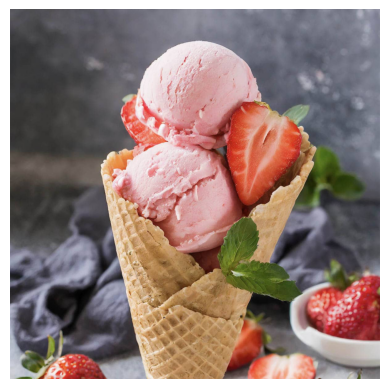

In [46]:
ice_cream = mpimg.imread("ice-cream.jpg")
plt.imshow(ice_cream)
plt.axis(False)

In [47]:
ice_cream.shape

(1200, 1200, 3)

In [48]:
ice_cream = normalize_and_resize("test-ice-cream-img.jpg")
ice_cream

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.6627451 , 0.6627451 , 0.67058825],
        [0.6627451 , 0.6627451 , 0.67058825],
        [0.6627451 , 0.6627451 , 0.67058825],
        ...,
        [0.63529414, 0.6509804 , 0.6627451 ],
        [0.63529414, 0.6509804 , 0.6627451 ],
        [0.637837  , 0.65352327, 0.6496017 ]],

       [[0.6627451 , 0.6627451 , 0.67058825],
        [0.6627451 , 0.6627451 , 0.67058825],
        [0.6627451 , 0.6627451 , 0.67058825],
        ...,
        [0.63529414, 0.6509804 , 0.6627451 ],
        [0.63529414, 0.6509804 , 0.6627451 ],
        [0.6350797 , 0.65076596, 0.6621017 ]],

       [[0.6627451 , 0.6627451 , 0.67058825],
        [0.6627451 , 0.6627451 , 0.67058825],
        [0.6627451 , 0.6627451 , 0.67058825],
        ...,
        [0.63529414, 0.6509804 , 0.6627451 ],
        [0.63529414, 0.6509804 , 0.6627451 ],
        [0.6392157 , 0.6509804 , 0.67058825]],

       ...,

       [[0.6117647 , 0.6117647 , 0.6117647 ],
        [0.61

In [49]:
prediction = model_2.predict(tf.expand_dims(ice_cream, axis=0))
prediction

1/1 [==============================] - 0s 26ms/step


array([[0.08893814, 0.02831813, 0.04057023, 0.03097182, 0.069642  ,
        0.05317818, 0.00248271, 0.07961081, 0.02492831, 0.04847313,
        0.05961623, 0.0508607 , 0.03216783, 0.03880124, 0.05596895,
        0.0850028 , 0.01702119, 0.04410804, 0.06137133, 0.0879682 ]],
      dtype=float32)

In [50]:
class_names[np.argmax(prediction)]

'apple_pie'

#### Can model recognize hamburger?

(-0.5, 1199.5, 1199.5, -0.5)

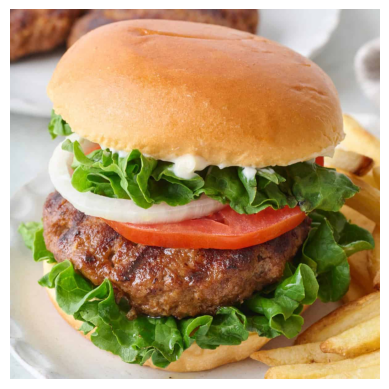

In [53]:
ham_burger = mpimg.imread("ham-burger.jpg")
plt.imshow(ham_burger)
plt.axis(False)

In [54]:
ham_burger = normalize_and_resize("ham-burger.jpg")
ham_burger

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.4987745 , 0.3379902 , 0.3272059 ],
        [0.5987745 , 0.4034314 , 0.35808823],
        [0.67107844, 0.46715686, 0.41617647],
        ...,
        [0.8       , 0.8235294 , 0.8156863 ],
        [0.8       , 0.8235294 , 0.8156863 ],
        [0.8       , 0.8235294 , 0.8156863 ]],

       [[0.5987745 , 0.4034314 , 0.35808823],
        [0.698269  , 0.46963847, 0.39581802],
        [0.7002451 , 0.49632353, 0.44534314],
        ...,
        [0.7882353 , 0.8117647 , 0.8039216 ],
        [0.8       , 0.8235294 , 0.8156863 ],
        [0.8       , 0.8235294 , 0.8156863 ]],

       [[0.660095  , 0.45617342, 0.405193  ],
        [0.6767157 , 0.47279412, 0.42181373],
        [0.6943321 , 0.49756435, 0.4625    ],
        ...,
        [0.79607844, 0.79607844, 0.79607844],
        [0.7882353 , 0.8117647 , 0.8039216 ],
        [0.8       , 0.8235294 , 0.8156863 ]],

       ...,

       [[0.8352941 , 0.8745098 , 0.8784314 ],
        [0.83

In [55]:
prediction = model_2.predict(tf.expand_dims(ham_burger, axis=0))
prediction

1/1 [==============================] - 0s 26ms/step


array([[0.02141845, 0.11033083, 0.07407902, 0.06657422, 0.02491714,
        0.07309941, 0.01159159, 0.16069002, 0.00849408, 0.03492152,
        0.02992549, 0.0093707 , 0.01572417, 0.04894307, 0.05491082,
        0.03362631, 0.04999083, 0.08783155, 0.06317621, 0.02038455]],
      dtype=float32)

In [56]:
class_names[np.argmax(prediction)]

'falafel'

### What is Transfer Learning?

In [58]:
import tensorflow_hub as hub

### Explore Tensorflow Hub for Pretrained Models

https://www.tensorflow.org/hub provides many trained machine learning models. Find pretrained models here: https://www.TFHUb.dev. Tensorflow allows you to use pretrained models by referencing a URL.

### Build ResNet Feature Model

In [60]:
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"
resnet_layer = hub.KerasLayer(resnet_url,
                             trainable=False,
                             input_shape=(128, 128, 3))
resnet_model = tf.keras.Sequential([
    resnet_layer,
    Dense(20, activation="softmax")
])

In [61]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense_6 (Dense)             (None, 20)                40980     
                                                                 
Total params: 23,605,780
Trainable params: 40,980
Non-trainable params: 23,564,800
_________________________________________________________________


In [62]:
resnet_model.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

In [63]:
resnet_history = resnet_model.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=steps_per_epoch,
                                 validation_data=val_data,
                                 validation_steps=validation_steps)

Epoch 1/5


2024-10-31 08:19:11.520252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-10-31 08:19:13.390470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/zeros_like_73/StatefulPartitionedCall' with dtype float and shape [?,1,1,2048]
	 [[{{node gradients/zeros_like_73/StatefulPartitionedCall}}]]
2024-10-31 08:19:13.390708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tens

200/200 [==============================] - ETA: 0s - loss: 2.6941 - accuracy: 0.3119

2024-10-31 08:20:18.651691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - 84s 396ms/step - loss: 2.6941 - accuracy: 0.3119 - val_loss: 2.0861 - val_accuracy: 0.4300
Epoch 2/5
200/200 [==============================] - 76s 378ms/step - loss: 1.1050 - accuracy: 0.6562 - val_loss: 2.0275 - val_accuracy: 0.4650
Epoch 3/5
200/200 [==============================] - 75s 374ms/step - loss: 0.6452 - accuracy: 0.8131 - val_loss: 2.1166 - val_accuracy: 0.4675
Epoch 4/5
200/200 [==============================] - 78s 389ms/step - loss: 0.3822 - accuracy: 0.9162 - val_loss: 2.1027 - val_accuracy: 0.4650
Epoch 5/5
200/200 [==============================] - 78s 388ms/step - loss: 0.2228 - accuracy: 0.9669 - val_loss: 2.0875 - val_accuracy: 0.4900


#### Can ResNet Recognize Lasagna?

In [66]:
prediction = resnet_model.predict(tf.expand_dims(lasagna, axis=0))
prediction

1/1 [==============================] - 1s 525ms/step


array([[8.91550165e-03, 4.73505491e-03, 2.46377778e-03, 4.96526808e-01,
        1.27233984e-02, 1.66609306e-02, 6.82030004e-05, 1.87624083e-03,
        2.79946942e-02, 1.99008081e-02, 3.72635041e-05, 7.52191711e-03,
        5.07285707e-02, 1.18173935e-01, 6.90035522e-02, 3.63021307e-02,
        4.57305228e-04, 3.66635546e-02, 5.20480275e-02, 3.71982940e-02]],
      dtype=float32)

In [67]:
class_names[np.argmax(prediction)]

'caesar_salad'

ResNet could not predict Lasagna!

#### Can ResNet Predict Ice Cream?

In [69]:
prediction = resnet_model.predict(tf.expand_dims(ice_cream, axis=0))
prediction

1/1 [==============================] - 0s 93ms/step


array([[1.8933043e-03, 2.0762865e-09, 3.7014658e-07, 4.9096652e-06,
        1.6308225e-06, 1.7744565e-06, 9.5003443e-11, 1.9408764e-04,
        3.7176737e-06, 1.2737709e-04, 9.9740785e-01, 6.1504548e-09,
        4.2308059e-08, 9.6055010e-06, 1.0887543e-05, 2.9037941e-10,
        5.8674172e-09, 4.4112254e-05, 1.6011710e-09, 3.0025584e-04]],
      dtype=float32)

In [70]:
class_names[np.argmax(prediction)]

'ice_cream'

ResNet could predict Ice Cream!

#### Can ResNet Predict Ham Burger?

In [72]:
prediction = resnet_model.predict(tf.expand_dims(ham_burger, axis=0))
prediction

1/1 [==============================] - 0s 98ms/step


array([[4.4450553e-07, 6.2094300e-06, 4.1625963e-08, 3.5238831e-10,
        1.1770460e-06, 2.9183220e-10, 2.3654978e-10, 1.1736688e-04,
        1.3592125e-07, 9.9986970e-01, 1.1752783e-06, 1.6851234e-07,
        9.9368824e-10, 2.9819780e-13, 3.4393699e-07, 6.7002154e-10,
        1.7244797e-07, 2.3538123e-08, 7.2653200e-10, 3.0065924e-06]],
      dtype=float32)

In [73]:
class_names[np.argmax(prediction)]

'hamburger'

ResNet could Predict Ham Burger!

### Build Efficient Net Feature Model

In [75]:
eff_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b7-feature-vector/1"
eff_layer = hub.KerasLayer(eff_url,
                             trainable=False,
                             input_shape=(128, 128, 3))
eff_model = tf.keras.Sequential([
    eff_layer,
    Dense(20, activation="softmax")
])

2024-10-31 08:40:35.640404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [4]
	 [[{{node inputs}}]]
2024-10-31 08:40:35.640620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [4]
	 [[{{node inputs}}]]
2024-10-31 08:40:40.718164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [4]
	 [[{{node inputs}}]]
2024-10-31 08:40:40.718385: 

In [76]:
eff_model.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

In [77]:
eff_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2560)              64097680  
                                                                 
 dense_7 (Dense)             (None, 20)                51220     
                                                                 
Total params: 64,148,900
Trainable params: 51,220
Non-trainable params: 64,097,680
_________________________________________________________________


In [78]:
eff_history = eff_model.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=steps_per_epoch,
                                 validation_data=val_data,
                                 validation_steps=validation_steps)

Epoch 1/5


2024-10-31 08:46:50.773497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-10-31 08:46:51.574627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2024-10-31 08:46:53.513001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/top_pool/PartitionedCall_grad/top_pool/PartitionedCall' with dtype floa

200/200 [==============================] - ETA: 0s - loss: 1.9960 - accuracy: 0.4375

2024-10-31 08:50:54.463172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - 289s 1s/step - loss: 1.9960 - accuracy: 0.4375 - val_loss: 1.4855 - val_accuracy: 0.6000
Epoch 2/5
200/200 [==============================] - 208s 1s/step - loss: 1.1967 - accuracy: 0.6631 - val_loss: 1.3191 - val_accuracy: 0.6150
Epoch 3/5
200/200 [==============================] - 206s 1s/step - loss: 0.9285 - accuracy: 0.7506 - val_loss: 1.2387 - val_accuracy: 0.6225
Epoch 4/5
200/200 [==============================] - 205s 1s/step - loss: 0.7699 - accuracy: 0.7931 - val_loss: 1.2305 - val_accuracy: 0.6400
Epoch 5/5
200/200 [==============================] - 205s 1s/step - loss: 0.6395 - accuracy: 0.8300 - val_loss: 1.2457 - val_accuracy: 0.6325


#### Can EfficientNet identify Lasagna?

In [79]:
prediction = eff_model.predict(tf.expand_dims(lasagna, axis=0))
prediction

1/1 [==============================] - 4s 4s/step


array([[7.9310104e-02, 4.1839347e-04, 2.3079387e-04, 8.9297630e-04,
        2.0533299e-02, 1.2060533e-03, 2.7616929e-06, 1.6011182e-03,
        3.0284118e-02, 2.5393988e-03, 3.4620170e-04, 7.0243520e-01,
        2.3733674e-02, 1.8651565e-04, 1.2655854e-01, 5.5715669e-04,
        4.8900856e-05, 1.0426975e-03, 4.0482031e-03, 4.0238118e-03]],
      dtype=float32)

In [80]:
class_names[np.argmax(prediction)]

'lasagna'

EfficientNet correctly predicted lasagna!

#### Can EfficientNet identify Ham Burger?

In [85]:
prediction = eff_model.predict(tf.expand_dims(ham_burger, axis=0))
prediction

1/1 [==============================] - 0s 151ms/step


array([[5.02464920e-03, 9.72552691e-04, 2.62166956e-04, 1.06919644e-04,
        3.41429521e-04, 4.73712062e-05, 2.19225301e-04, 2.94057792e-03,
        1.22318207e-03, 9.85865951e-01, 2.07761521e-04, 9.52074712e-04,
        2.26655640e-04, 4.31730041e-05, 2.09547245e-04, 4.35409602e-05,
        1.35211696e-04, 3.50444170e-05, 4.28364758e-04, 7.14709691e-04]],
      dtype=float32)

In [86]:
class_names[np.argmax(prediction)]

'hamburger'

EfficientNet correctly predicted Ham Burger!

#### Can EfficientNet identify Ice Cream?

In [87]:
prediction = eff_model.predict(tf.expand_dims(ice_cream, axis=0))
prediction

1/1 [==============================] - 0s 142ms/step


array([[4.9967967e-02, 2.9833100e-03, 1.3015707e-04, 3.7608272e-03,
        2.4336576e-03, 4.2618245e-02, 9.6216909e-06, 8.0508972e-03,
        1.2615811e-03, 3.6105988e-04, 8.3403873e-01, 1.0321977e-03,
        8.0869067e-04, 1.1749588e-02, 3.8399783e-04, 1.0296567e-04,
        6.7616982e-04, 9.7867487e-05, 6.2761116e-03, 3.3256434e-02]],
      dtype=float32)

In [88]:
class_names[np.argmax(prediction)]

'ice_cream'

EfficientNet correctly predicted Ice Cream!